In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## Preprocessing

In [ ]:
def MinMaxScaler(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  return numerator / (denominator + 1e-7)

In [ ]:
path = "./drive/MyDrive/colab/ML_lab/"
file = path+"data-02-stock_daily.csv"

timesteps = seq_length = 7
data_dim = 5
output_dim = 1

xy = np.loadtxt(file, delimiter=',')
xy = xy[::-1]
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]

dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
  _x = x[i:i + seq_length]
  _y = y[i + seq_length]
  # print(_x, "->", _y)
  dataX.append(_x)
  dataY.append(_y)

In [ ]:
# split to train and testing
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

## 문제 1

In [ ]:
def plot(output, title):
  color=["black", "red", "blue", "magenta"]
  label=["y", "base", "LSTM", "base + layer"]
  plt.figure(figsize=(15,10))
  for i, y in enumerate(output):
    plt.plot(y, label=label[i], color=color[i])

  plt.title(title)
  plt.xlabel('day')
  plt.ylabel('close')
  plt.legend()
  plt.show()

Epoch 1/30
16/16 [==============================] - 1s 7ms/step - loss: 0.1412
Epoch 2/30
16/16 [==============================] - 0s 7ms/step - loss: 0.0120
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 0.0051
Epoch 4/30
16/16 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 5/30
16/16 [==============================] - 0s 7ms/step - loss: 0.0019
Epoch 6/30
16/16 [==============================] - 0s 6ms/step - loss: 0.0017
Epoch 7/30
16/16 [==============================] - 0s 7ms/step - loss: 0.0015
Epoch 8/30
16/16 [==============================] - 0s 8ms/step - loss: 0.0015
Epoch 9/30
16/16 [==============================] - 0s 7ms/step - loss: 0.0014
Epoch 10/30
16/16 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 11/30
16/16 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 12/30
16/16 [==============================] - 0s 6ms/step - loss: 0.0013
Epoch 13/30
16/16 [==============================

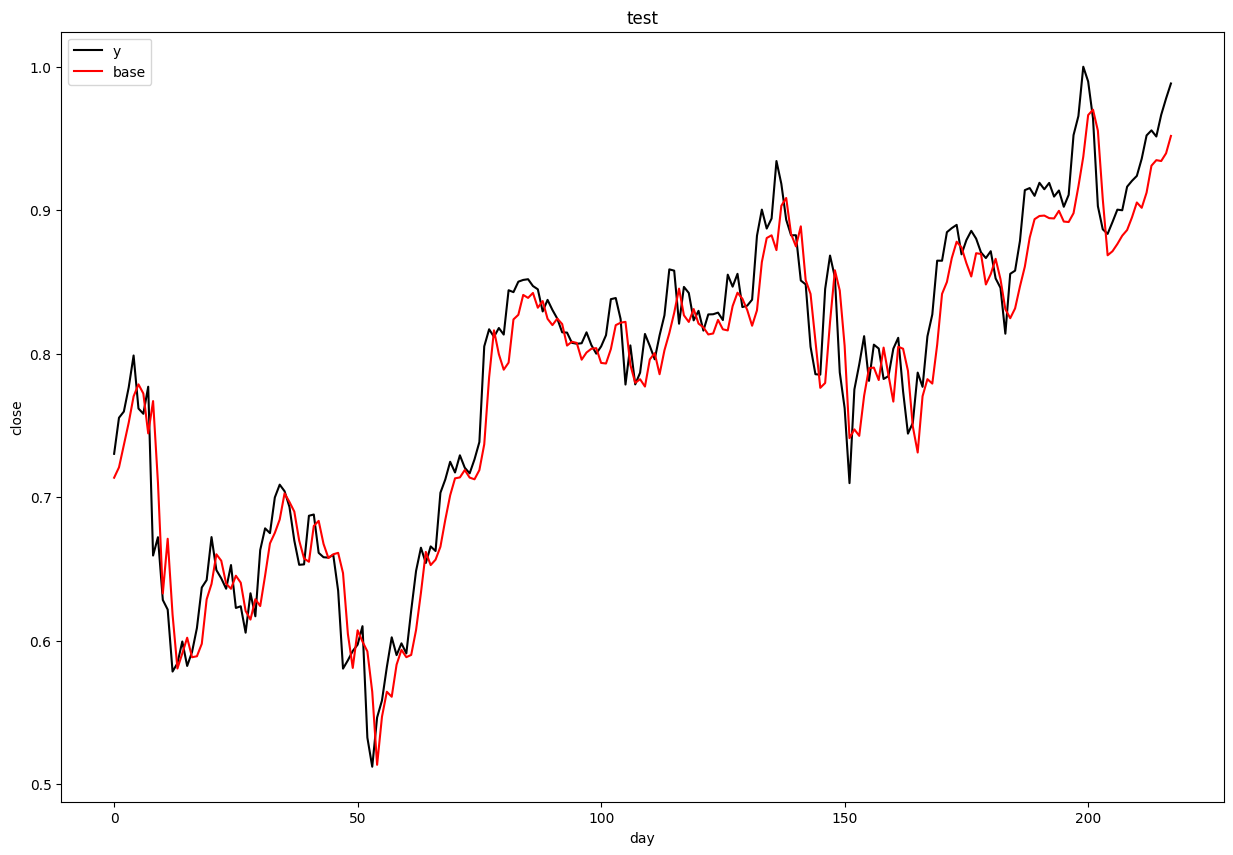

In [ ]:
n_units = 256
simpleRNN_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=n_units, return_sequences=False,
                              input_shape=[7, 5]),
    tf.keras.layers.Dense(1)
])

simpleRNN_model.compile(optimizer='adam', loss='mse')
simpleRNN_model.fit(trainX, trainY, epochs=30)

pred = simpleRNN_model.predict(testX)
output = [testY, pred]
plot(output, "test")

## 문제 2

Epoch 1/30
16/16 [==============================] - 2s 4ms/step - loss: 0.0318
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0044
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 9/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 10/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 11/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 12/30
16/16 [==============================] - 0s 6ms/step - loss: 0.0020
Epoch 13/30
16/16 [==============================

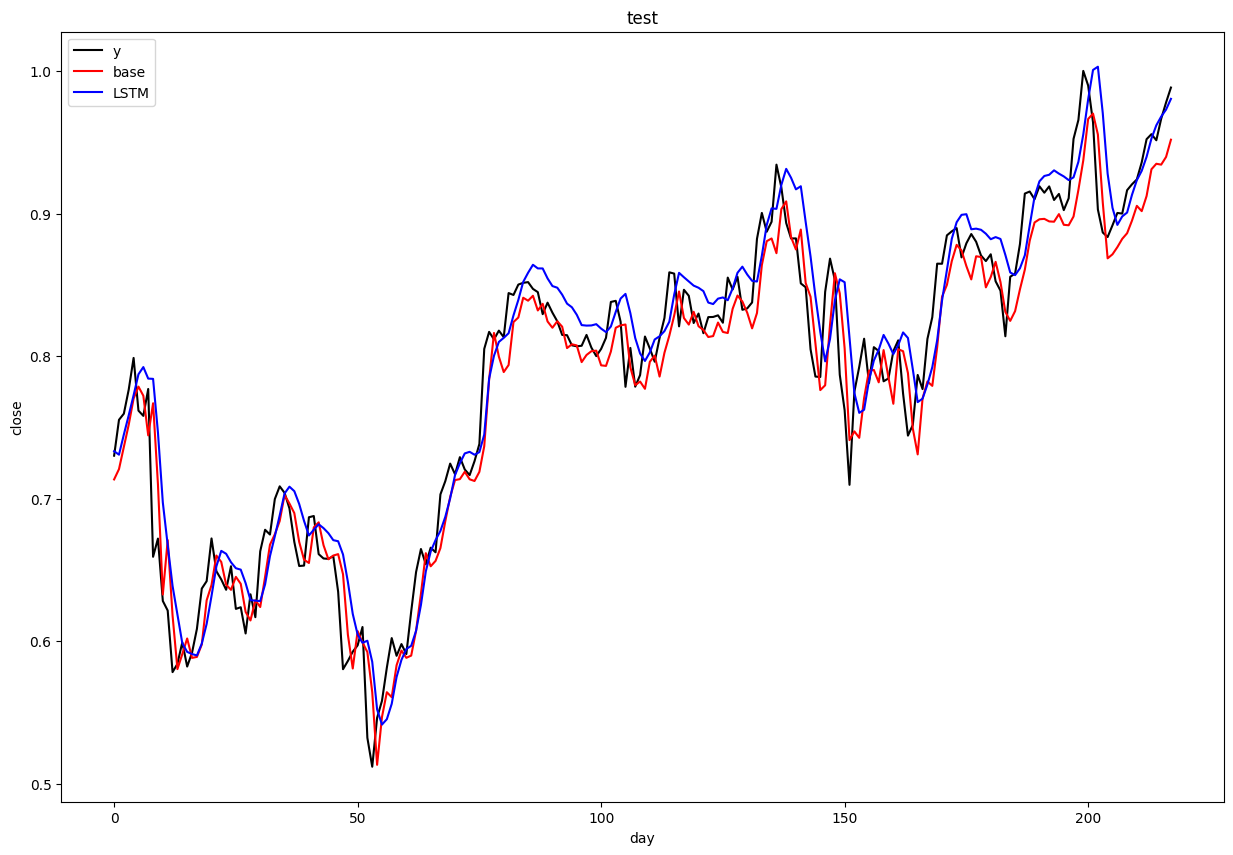

In [ ]:
n_units = 256
LSTM_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=n_units, return_sequences=False,
                              input_shape=[7, 5]),
    tf.keras.layers.Dense(1)
])

LSTM_model.compile(optimizer='adam', loss='mse')
LSTM_model.fit(trainX, trainY, epochs=30)

LSTM_pred = LSTM_model.predict(testX)
output.append(LSTM_pred)
plot(output, "test")

## 문제 3

Epoch 1/30
16/16 [==============================] - 5s 25ms/step - loss: 0.1363
Epoch 2/30
16/16 [==============================] - 0s 26ms/step - loss: 0.0207
Epoch 3/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0076
Epoch 4/30
16/16 [==============================] - 0s 26ms/step - loss: 0.0038
Epoch 5/30
16/16 [==============================] - 0s 25ms/step - loss: 0.0031
Epoch 6/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0026
Epoch 7/30
16/16 [==============================] - 0s 24ms/step - loss: 0.0025
Epoch 8/30
16/16 [==============================] - 0s 26ms/step - loss: 0.0025
Epoch 9/30
16/16 [==============================] - 0s 23ms/step - loss: 0.0024
Epoch 10/30
16/16 [==============================] - 0s 25ms/step - loss: 0.0024
Epoch 11/30
16/16 [==============================] - 0s 26ms/step - loss: 0.0023
Epoch 12/30
16/16 [==============================] - 0s 26ms/step - loss: 0.0021
Epoch 13/30
16/16 [==================

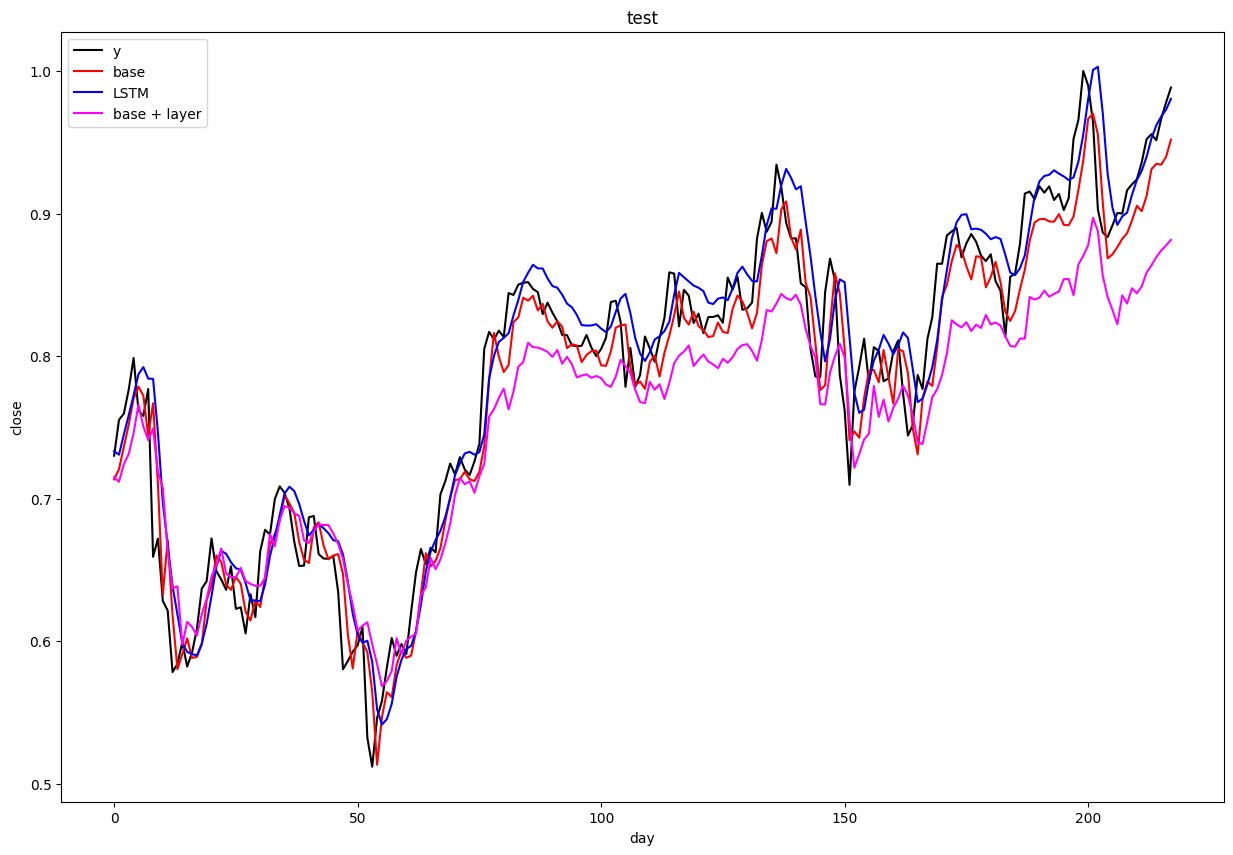

In [ ]:
n_units = 34
model_multilayer = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=n_units, return_sequences=True,
                              input_shape=[7, 5]),
    tf.keras.layers.SimpleRNN(units=n_units, return_sequences=True),
    tf.keras.layers.SimpleRNN(units=n_units, return_sequences=True),
    tf.keras.layers.SimpleRNN(units=n_units),
    tf.keras.layers.Dense(1)
])

model_multilayer.compile(optimizer='adam', loss='mse')
model_multilayer.fit(trainX, trainY, epochs=30)

multilayer_pred = model_multilayer.predict(testX)
output.append(multilayer_pred)
plot(output, "test")